In [15]:
# *IMPORT PACKAGES 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [17]:
#THIS PROJECT HAS TRAIN AND TEST DATA GIVEN SEPERATLY AND I WILL TREAT BOTH DATA SEPERATLY BECAUSE THERE IS A CHANCE OF 
#DATA LEAKEAGE IT MIGHT LEAD TO OVERFITTING OF THE MODEL 

In [18]:
df_train=pd.read_excel('Data_Train.xlsx')

In [19]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
df_train.shape

(10683, 11)

In [21]:
df_train.info()  # DATA CONSIST OF OBJECT DATA TYPE  EXCEPT THE PRICE COLUMN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [22]:
df_train.isnull().sum()  # THERE ARE ONLY TWO NULL VALUES SO WE CAN DROP THEM 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [23]:
df_train.dropna(inplace=True)  # droping the null values 

In [24]:
# checking the null values after droping 

df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [25]:
# AS THIS DATA HAS ALOT OF DIFFRENT  VALUES UNITS ,WE WILL HAVE TO DO ALOT OF EDA ,EXTRACT INFORMATION 
# SO WE START WITH CATEGORICAL COLUMNS TO CONVERT THEM INTO NUMERIC 

    
Airline=pd.get_dummies(df_train['Airline'])

In [26]:
Airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [27]:
Source=pd.get_dummies(df_train['Source'],drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [28]:
Destination=pd.get_dummies(df_train['Destination'],drop_first=True)

In [29]:
# DROPPING ROUTE AND ADDITIONAL INFO AS THEY ARE NOT ADDING ANY INFORMATION TO DATA 

df_train.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [30]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [31]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [32]:
# LABEL ENCODE THE TOTAL_STOP COLUMNS 

from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

df_train.Total_Stops = le.fit_transform(df_train.Total_Stops)

In [34]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,4,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,1,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,1,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,0,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,0,13302


In [35]:
# THE DATE OF JOURNEY,DEP_TIME,ARRIVAL_TIME,DURATION WE NEED TO CONVERT IT INTO DATETIME DTYPE AND THEN EXTRACT THE INFO WE NEED 


df_train['Day_of_Journey']=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.day

In [36]:



df_train['month_of_Journey']=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.month

In [37]:
#DEP_TIME

df_train['hours_dep']=pd.to_datetime(df_train.Dep_Time).dt.hour

In [38]:
df_train['min_dep']=pd.to_datetime(df_train.Dep_Time).dt.minute

In [39]:
#ARRIVAL TIME 

df_train['hours_arv']=pd.to_datetime(df_train.Arrival_Time).dt.hour

df_train['min_arv']=pd.to_datetime(df_train.Arrival_Time).dt.minute

In [40]:
# CONVERTING HOURS INTO MINUTES IN DURATION COLUMN BY REPLACING HOUR INTO MINUTES 


df_train['Duration']=df_train['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [41]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day_of_Journey,month_of_Journey,hours_dep,min_dep,hours_arv,min_arv
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,170,4,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,445,1,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,1140,1,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,325,0,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,285,0,13302,1,3,16,50,21,35


In [42]:
# AS WE HAVE EXTRACTED THE INFO FROM THESE COLUMNS SO WE WILL DROP THEM AS WE HAVE CREATED THE COLUMNS WE NEED 

df_train.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True,axis=1)

In [43]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day_of_Journey,month_of_Journey,hours_dep,min_dep,hours_arv,min_arv
0,IndiGo,Banglore,New Delhi,170,4,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,1,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,1,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,0,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,0,13302,1,3,16,50,21,35


<AxesSubplot:>

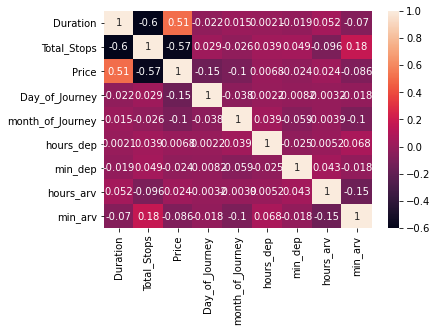

In [44]:
sns.heatmap(df_train.corr(),annot=True)


<AxesSubplot:xlabel='Airline', ylabel='Price'>

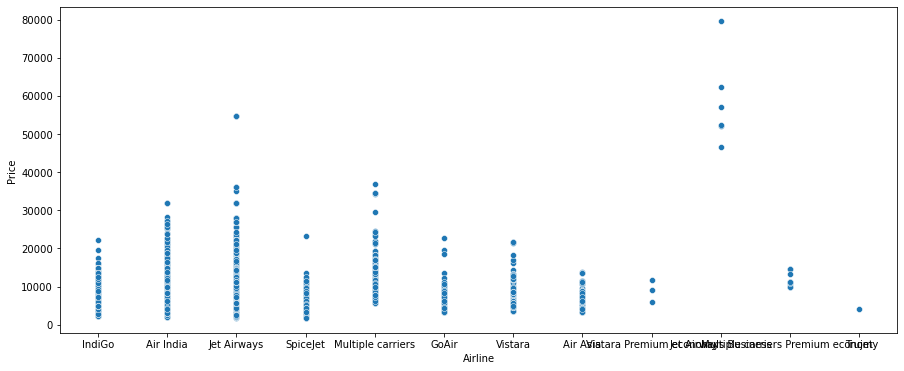

In [45]:
plt.figure(figsize=(15,6))                            # JET BUISNESS IS MOST EXPENSIVE 
sns.scatterplot(y='Price',x='Airline',data=df_train)

<AxesSubplot:xlabel='Source', ylabel='Price'>

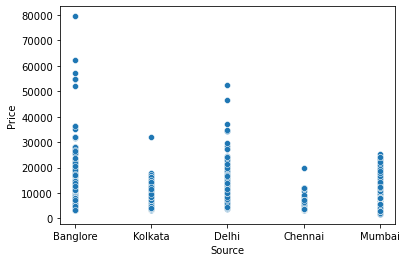

In [46]:
sns.scatterplot(y='Price',x='Source',data=df_train)  ## BANGLORE HAS FEW OUTLIERS ,THIS IS THE MOST EXPENSIVE PRICES 

<AxesSubplot:xlabel='Destination', ylabel='Price'>

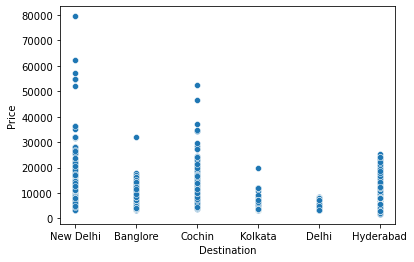

In [47]:


sns.scatterplot(y='Price',x='Destination',data=df_train) #DELHI AS A DESTINATION HAS MOST EXPENSIVE PRICES 

In [48]:
# CONCAT ALL THE INFORMATION WE GATHERED INTO TRAIN DATA 

data_train=pd.concat([df_train,Airline,Destination,Source],axis=1)



#DROPPING THE COLUMNS WE DONT REQUIRE NOW 
data_train.drop(['Airline','Destination','Source'],inplace=True,axis=1)

data_train.head()

,Duration,Total_Stops,Price,Day_of_Journey,month_of_Journey,hours_dep,min_dep,hours_arv,min_arv,Air Asia,...,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,170,4,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,1,0,0,0,0
1,445,1,7662,1,5,5,50,13,15,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,1,13882,9,6,9,25,4,25,0,...,0,1,0,0,0,0,0,1,0,0
3,325,0,6218,12,5,18,5,23,30,0,...,0,0,0,0,0,0,0,0,1,0
4,285,0,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
data_train.shape

(10682, 30)

# TEST DATA 

In [50]:
# we will do the exact same EDA process as we did for train data ,test data does not have the target column 


df_test=pd.read_excel('Test_set.xlsx')

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [51]:
df_test.shape

(2671, 10)

In [52]:
df_test.info()      # ITS ALL OBJECT TYPE DATA TYPE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [53]:
df_test.isnull().sum() # NO NULL VALUES ARE PRESENT 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [54]:
# DROPPING ROUTE AND ADDITIONAL INFO AS THEY ARE NOT ADDING ANY INFORMATION TO DATA 

df_test.drop(['Route','Additional_Info'],axis=1,inplace=True)


In [55]:

# ONE HOT ENCODING TO CONVERT THE CATEGORICAL COLUMNS TO NUMERIC 


Airline=pd.get_dummies(df_test['Airline'],drop_first=True)

Source=pd.get_dummies(df_test['Source'],drop_first=True)


Destination=pd.get_dummies(df_test['Destination'],drop_first=True)



# LABEL ENCODE THE TOTAL_STOP COLUMNS 

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df_test.Total_Stops = le.fit_transform(df_test.Total_Stops)



# THE DATE OF JOURNEY,DEP_TIME,ARRIVAL_TIME,DURATION WE NEED TO CONVERT IT INTO DATETIME DTYPE AND THEN EXTRACT THE INFO WE NEED 


df_test['Day_of_Journey']=pd.to_datetime(df_test.Date_of_Journey,format='%d/%m/%Y').dt.day




df_test['month_of_Journey']=pd.to_datetime(df_test.Date_of_Journey,format='%d/%m/%Y').dt.month



#DEP_TIME

df_test['hours_dep']=pd.to_datetime(df_test.Dep_Time).dt.hour



df_test['min_dep']=pd.to_datetime(df_test.Dep_Time).dt.minute




#ARRIVAL TIME 

df_test['hours_arv']=pd.to_datetime(df_test.Arrival_Time).dt.hour

df_test['min_arv']=pd.to_datetime(df_test.Arrival_Time).dt.minute



# CONVERTING HOURS INTO MINUTES 


df_test['Duration']=df_test['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [56]:
# AS WE HAVE EXTRACTED THE INFO FROM THESE COLUMNS SO WE WILL DROP THEM AS WE HAVE CREATED THE COLUMNS WE NEED 

df_test.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True,axis=1)

In [57]:
df_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Day_of_Journey,month_of_Journey,hours_dep,min_dep,hours_arv,min_arv
0,Jet Airways,Delhi,Cochin,655,0,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,0,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,0,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,0,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,4,24,6,23,55,2,45


In [58]:
# CONCAT ALL THE INFORMATION WE GATHERED INTO TRAIN DATA 

data_test=pd.concat([df_test,Airline,Destination,Source],axis=1)



#DROPPING THE COLUMNS WE DONT REQUIRE NOW 
data_test.drop(['Airline','Destination','Source'],inplace=True,axis=1)

data_test.head()

,Duration,Total_Stops,Day_of_Journey,month_of_Journey,hours_dep,min_dep,hours_arv,min_arv,Air India,GoAir,...,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,655,0,6,6,17,30,4,25,0,0,...,0,1,0,0,0,0,0,1,0,0
1,240,0,12,5,6,20,10,20,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1425,0,21,5,19,15,19,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,780,0,21,5,8,0,21,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,170,4,24,6,23,55,2,45,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
data_test.shape

(2671, 27)

<AxesSubplot:>

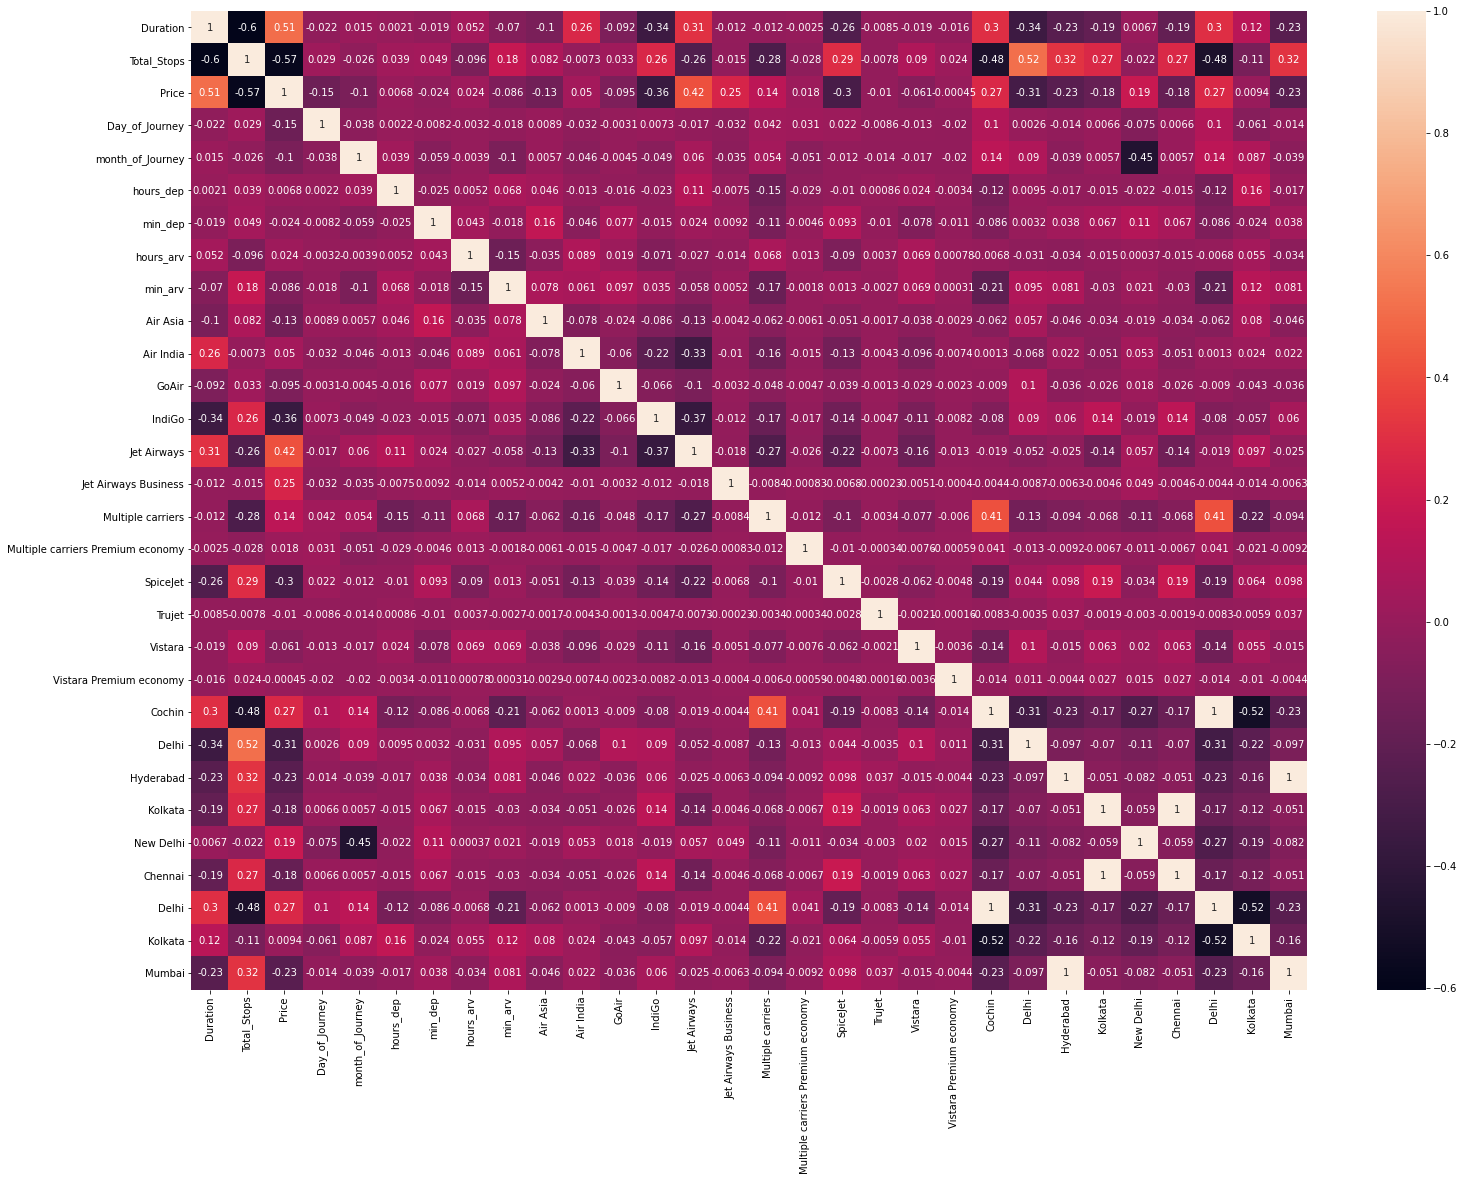

In [60]:

plt.figure(figsize=(25,18))
sns.heatmap(data_train.corr(),annot=True)

In [61]:
data_train.head()

,Duration,Total_Stops,Price,Day_of_Journey,month_of_Journey,hours_dep,min_dep,hours_arv,min_arv,Air Asia,...,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,170,4,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,1,0,0,0,0
1,445,1,7662,1,5,5,50,13,15,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,1,13882,9,6,9,25,4,25,0,...,0,1,0,0,0,0,0,1,0,0
3,325,0,6218,12,5,18,5,23,30,0,...,0,0,0,0,0,0,0,0,1,0
4,285,0,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
# DIVIDING THE DATA INTO X AND Y  ]FOR TRAINING 

x=data_train.drop('Price',axis=1)
y=data_train['Price']

In [63]:
print(x.shape)
print(y.shape)

(10682, 29)
(10682,)


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
#Applying the linear regresion

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)


In [66]:
score=lr.score(x_train,y_train)
score

0.5886031728179933

In [67]:
from sklearn.metrics import r2_score
print(r2_score(y_test,lrpred))

0.594916843419875


In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, lrpred))
print('MSE:', metrics.mean_squared_error(y_test,lrpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lrpred)))

MAE: 2092.31778776685
MSE: 8734425.838149903
RMSE: 2955.4062052702507


In [69]:
# applying random forest 

from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
rdrpred=rdr.predict(x_test)

In [70]:
rdr.score(x_train,y_train)

0.9520481868767441

In [71]:
print(r2_score(y_test,rdrpred))

0.8198686215140472


In [72]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rdrpred))
print('MSE:', metrics.mean_squared_error(y_test,rdrpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rdrpred)))

MAE: 1165.4944370913493
MSE: 3884002.92866302
RMSE: 1970.7873879906529


In [73]:
#applying the decision tree 

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred=dtr.predict(x_test)
dtr.score(x_train,y_train)


0.9692484150527355

In [74]:
r2_score(y_test,dtrpred)

0.7746898293875277

In [75]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, dtrpred))
print('MSE:', metrics.mean_squared_error(y_test,dtrpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtrpred)))

MAE: 1292.022812353767
MSE: 4858150.589152628
RMSE: 2204.1212736944917


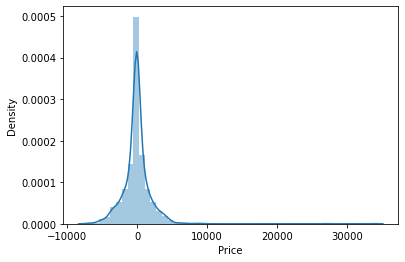

In [76]:
# distplot for best model 

                                  # FOR RANDOM FOREST IT IS FORMING A VERY GOOD DISTRIBUTION,OUR MODEL IS PERFORMING WELL 
sns.distplot(y_test-rdrpred)
plt.show()

In [77]:
# applying the cross validation

from sklearn.model_selection import cross_val_score

In [78]:
# cross val for random forest 

score=cross_val_score(rdr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81551357 0.82209908 0.84203606 0.81583682 0.79332581]
0.817762267302529
0.015581586630496594


In [79]:
# cross val for decisiontree

score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.70725791 0.69642566 0.73540554 0.72854787 0.65063105]
0.7036536057173299
0.030015112065644507


In [80]:
# cross val for linear regression 

score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.56254192 0.61097957 0.5873182  0.56224973 0.60890914]
0.5863997133884107
0.021279584043153076


In [81]:
# SAVING THE BEST MODEL that is random forest with 82% accuracy

import pickle as pk
file=open('FLIGHT_PRICE_.pkl','wb')
pk.dump(rdr,file)

# *CONCLUSION

I HAVE MADE A FLIGHT PRICE PREDICTION MODEL ,BY USING THIS WE CAN ENTER A RANDOM DATA AND FING THE PRICE FOR THE PATICULAR FLIGHT 
I HAVE LEARNT THE DIFFRENT TECHNIQUS OF EDA ,PREPROCESSING ,MODEL BUILDING 
FINALLY ABLE TO GET THE BEST SCORE FROM RANDOM FOREST 